Total sessions played: 105869
Median session time (minutes): 54.0

Average sessions per user per month:
     Month  AvgSessionsPerUser
0  2022-08            4.357166
1  2022-09            6.925784
2  2022-10            5.392617
3  2022-11            4.555408
4  2022-12            4.013594
5  2023-01            3.541207
6  2023-02            4.258787
7  2023-03            4.133333


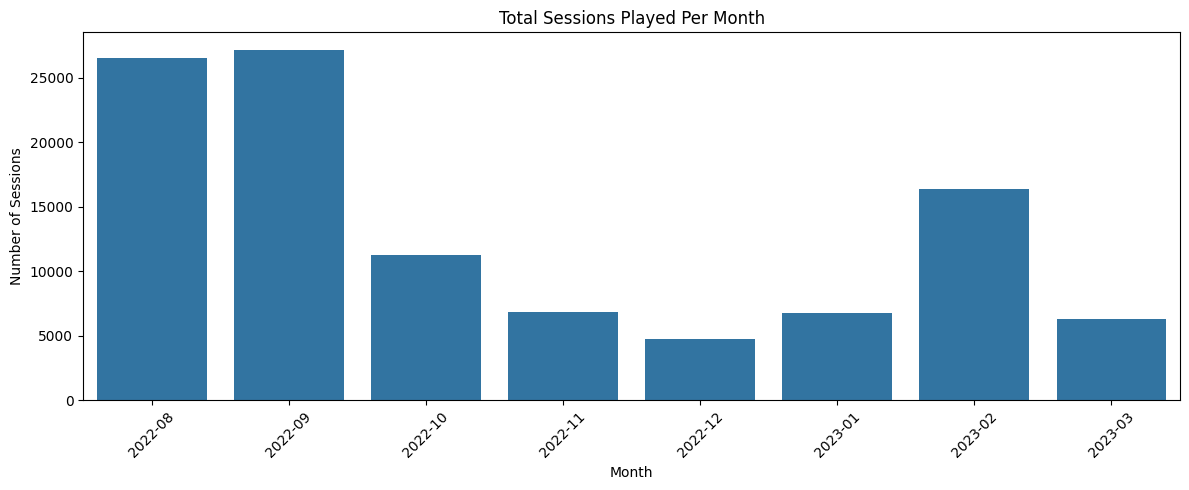

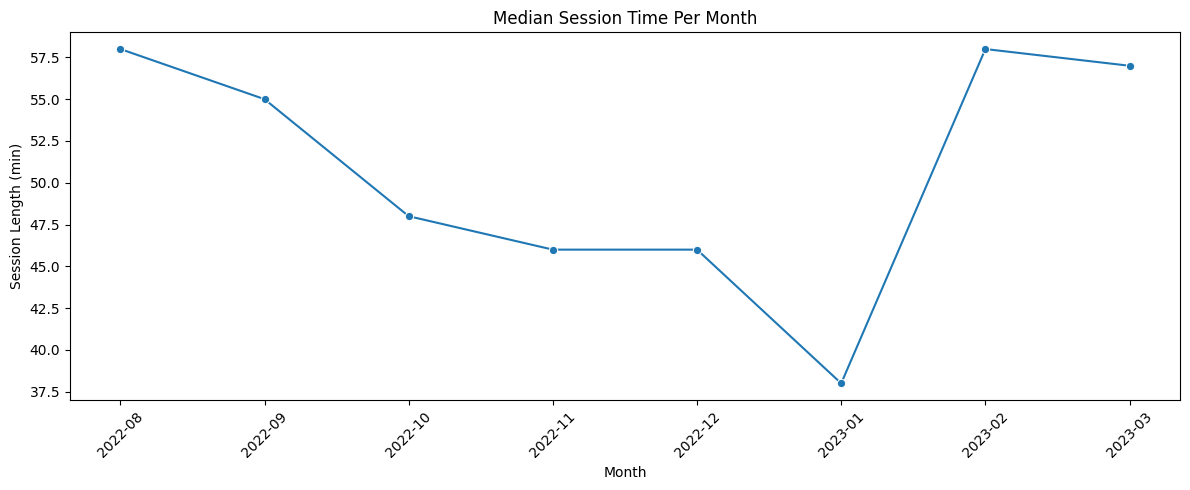

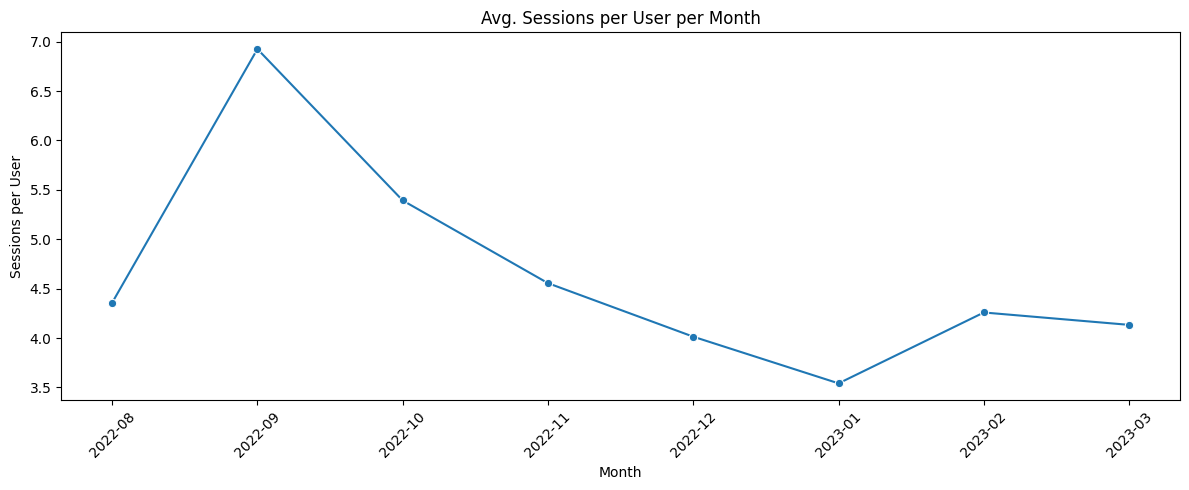

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data/exited_game.csv")

#Converts time columns
data['Time'] = pd.to_datetime(data['Time'])
data['Month'] = data['Time'].dt.to_period('M').astype(str)


#1. Total number of sessions
total_sessions = len(data)
print("Total sessions played:", total_sessions)


#2. Median session length
median_session_length = data['CurrentSessionLength'].median()
print("Median session time (minutes):", median_session_length)


#3. Average number of sessions per user per month
sessions_per_user_month = (
    data.groupby(['Month', 'pid'])
    .size()
    .reset_index(name='SessionCount')
    .groupby('Month')['SessionCount']
    .mean()
    .reset_index(name='AvgSessionsPerUser')
)
print("\nAverage sessions per user per month:")
print(sessions_per_user_month)



#Visualization

##Total sessions per month
sessions_per_month = data['Month'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.barplot(x=sessions_per_month.index, y=sessions_per_month.values)
plt.title("Total Sessions Played Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Median session length over time
median_session_per_month = (
    data.groupby('Month')['CurrentSessionLength'].median().reset_index()
)

plt.figure(figsize=(12, 5))
sns.lineplot(data=median_session_per_month, x='Month', y='CurrentSessionLength', marker='o')
plt.title("Median Session Time Per Month")
plt.xlabel("Month")
plt.ylabel("Session Length (min)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Average sessions per user per month
plt.figure(figsize=(12, 5))
sns.lineplot(data=sessions_per_user_month, x='Month', y='AvgSessionsPerUser', marker='o')
plt.title("Avg. Sessions per User per Month")
plt.xlabel("Month")
plt.ylabel("Sessions per User")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
